In [1]:

api_key = '59137ccec61ce6e3b25320357770eac7'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


plt.style.use('fivethirtyeight')
pd.options.display.max_columns = 500
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

from fredapi import Fred




In [3]:
fred_key = api_key

In [4]:
# Creat the Fred Object

fred = Fred(fred_key)

In [5]:
# Search Fred for ecnonomic data

initial_data = fred.search('S&P', order_by = 'popularity')

initial_data.head()


,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-05-12,2023-05-12,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-05-11,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-05-12 13:36:55-05:00,95,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-05-12,2023-05-12,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-02-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-04-25 08:13:02-05:00,90,"For more information regarding the index, plea..."
SP500,SP500,2023-05-12,2023-05-12,S&P 500,2013-04-30,2023-05-11,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-05-12 13:37:08-05:00,84,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-05-12,2023-05-12,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-05-11,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-05-12 13:37:08-05:00,84,This data represents the effective yield of th...
MEHOINUSA672N,MEHOINUSA672N,2023-05-12,2023-05-12,Real Median Household Income in the United States,1984-01-01,2021-01-01,Annual,A,2021 CPI-U-RS Adjusted Dollars,2021 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2022-09-13 13:48:01-05:00,81,Household data are collected as of March. As ...


In [6]:
sp500 = fred.get_series(series_id='sp500')

<AxesSubplot:title={'center':'S&P 500'}>

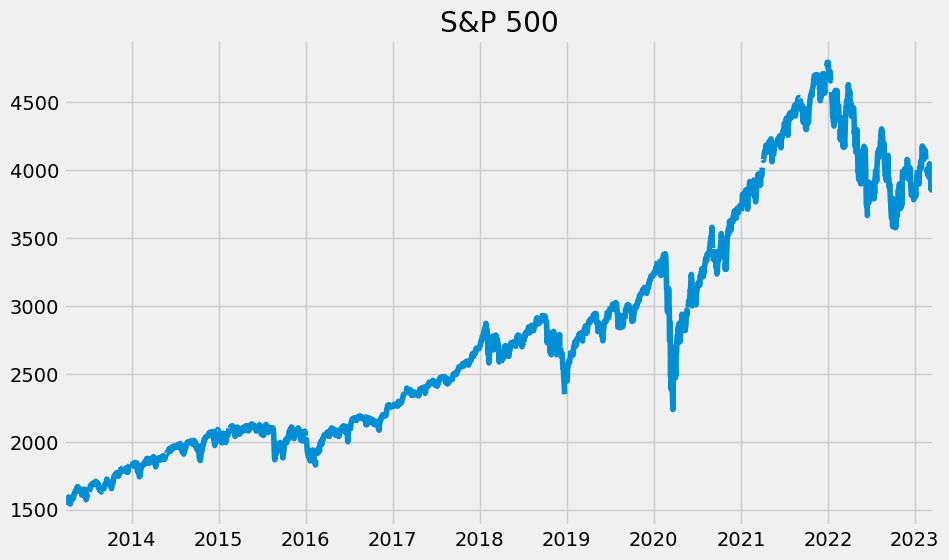

In [7]:
sp500.plot(figsize = (10,6), title = "S&P 500")

In [103]:
t2y = fred.search('T10Y2Y', filter = ('frequency','Daily'))
t2y = t2y.query('id == "T10Y2Y"')
ffr = fred.search('Federal Funds Rate', filter = ('frequency','Daily'))
ffr_output = ffr.query('id == "DFF"')


In [150]:
all_results = []

for myid in t2y.index:
    results = fred.get_series(myid)
    results = results.to_frame(name = myid)
    all_results.append(results)
final_output = pd.concat(all_results, axis = 1)
final_output.index.name='Frequency'
    

In [151]:
final_output

,T10Y2Y
Frequency,
1976-06-01,0.68
1976-06-02,0.71
1976-06-03,0.70
1976-06-04,0.77
1976-06-07,0.79
...,...
2023-03-10,-0.90
2023-03-13,-0.48
2023-03-14,-0.56


In [152]:
import os  
final_output.to_csv('c:\\Users\\rudym\\OneDrive\\Desktop\\VS Code\\python\\output.csv', index = True)  

In [153]:
all_results2 = []

for myid in ffr_output.index:
    results = fred.get_series(myid)
    results = results.to_frame(name = myid)
    all_results2.append(results)
final_output2 = pd.concat(all_results2, axis = 1)
final_output2.index.name='Frequency'

In [154]:
final_output2
final_output2.to_csv('c:\\Users\\rudym\\OneDrive\\Desktop\\VS Code\\python\\output2.csv', index = True) 